# Salary Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets
datasets = pd.read_csv('datasets/salary.csv')

datasets.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, 1].values

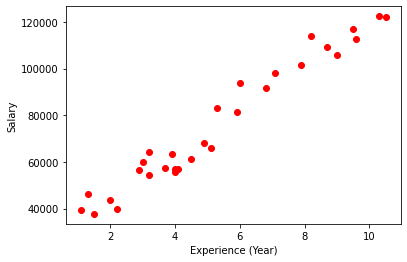

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, Y, color = 'red')
plt.xlabel("Experience (Year)")
plt.ylabel("Salary")
plt.show()

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

In [5]:
# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [6]:
regressor.fit(X_Train, Y_Train)

LinearRegression()

In [7]:
regressor.coef_

array([9394.26971343])

In [8]:
regressor.intercept_

25780.79000171234

In [9]:
Y_pred = regressor.predict(X_Train)

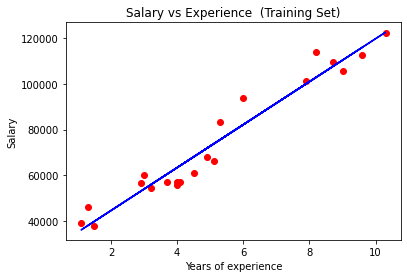

In [10]:
# Visualising the Training set results

plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Train, Y_pred, color = 'blue')
plt.title('Salary vs Experience  (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [11]:
# Predicting the Test set result
Y_Pred = regressor.predict(X_Test)

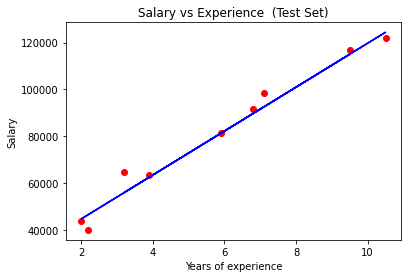

In [12]:
# Visualising the Test set results

plt.scatter(X_Test, Y_Test, color = 'red')
plt.plot(X_Test, Y_Pred, color = 'blue')
plt.title('Salary vs Experience  (Test Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

<div class="alert">
<a href="https://github.com/mahesh147/Simple-Linear-Regression">Reference</a>
</div>

# Diabetes Classifier

This program builds a classifier for Pima Indians Diabetes dataset - https://www.kaggle.com/uciml/pima-indians-diabetes-database. It is a binary (2-class) classification problem. There are 768 observations with 8 input variables and 1 output/target variable. The variable names are as follows:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [13]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline

In [14]:
df = pd.read_csv('datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# see all numerical columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(X.shape, y.shape)

(768, 8) (768,)


In [18]:
# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [20]:
clf.fit(X_train, y_train)

F:\Anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [21]:
clf.score(X_train, y_train)

0.7719869706840391

In [22]:
clf.score(X_test, y_test)

0.7467532467532467

In [23]:
X_test[0]

array([  6.  ,  98.  ,  58.  ,  33.  , 190.  ,  34.  ,   0.43,  43.  ])

In [24]:
clf.predict([X_test[0]])

array([0], dtype=int64)

In [25]:
clf.predict_proba([X_test[0]])

array([[0.71872232, 0.28127768]])

In [26]:
clf.coef_

array([[ 0.06455384,  0.03381866, -0.01463896,  0.00503965, -0.00190731,
         0.10005334,  0.58857688,  0.03633671]])

In [27]:
clf.intercept_

array([-8.81192569])

<div class="alert">
<a href="https://github.com/JNYH/diabetes_classifier">Reference</a>
</div>

<div class="alert">
<div style="direction:ltr;text-align:left;font-family:B Tahoma"> Deep Learning Course
<br>Vahid Reza Khazaie<br>
</div>
<a href="https://www.linkedin.com/in/vahidrezakhazaie/">LinkedIn</a> - <a href="https://github.com/vrkh1996">GitHub</a>

</div>